Citation Request: This dataset is public available for research. The details are described in [Moro et al., 2011].

Available at: [pdf] http://hdl.handle.net/1822/14838 [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

### Title: Bank Marketing
### Number of Attributes: 16 + output attribute.
### Missing Attribute Values: None
### The classification goal is to predict if the client will subscribe a term deposit .
Input variables:
### I. Bank client data:
1 - age (numeric) 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) 4 - education (categorical: "unknown","secondary","primary","tertiary") 5 - default: has credit in default? (binary: "yes","no") 6 - balance: average yearly balance, in euros (numeric) 7 - housing: has housing loan? (binary: "yes","no") 8 - loan: has personal loan? (binary: "yes","no")

### II.Related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 10 - day: last contact day of the month (numeric) 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") 12 - duration: last contact duration, in seconds (numeric)

### III. Other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) 15 - previous: number of contacts performed before this campaign and for this client (numeric) 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target): 17 - y - has the client subscribed a term deposit? (binary: "yes","no").
  ### Based on our understanding of the problem we will apply a logistic regression algorithm to predict if a client will subscribe a term deposit or not.

In [1]:
#Let's import some relevant libraries.
import numpy as np
import seaborn as sn
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")# To ignore NoteBook warnings.

dataset = pd.read_csv('bank-full.csv', sep=';')# Loading our data.
# We will use a funcrion to clean our data.
def preprocess_data(new_data):
    new_data.rename(columns={'default':'credit_card','y':'term_deposit'},inplace= True)
    new_data.replace({'term_deposit':{'yes':1,'no':0}},inplace= True)
# we will gather the job values in employee for those who have a job no matter the job type.    
    new_data.replace({'job':{'management':'employee','technician':'employee','blue-collar':'employee',
                   'admin.':'employee','services':'employee','self-employed':'employee',
                     'housemaid':'employee'  }},inplace= True)
# We will delete all the variables related to the campaign and some client's variables.   
    new_data.drop(['age','education','balance','contact','month','poutcome','day',
                   'duration','campaign','previous','pdays'] ,axis=1, inplace= True)
    return new_data
clean_data=preprocess_data(dataset)
clean_data.head()

,job,marital,credit_card,housing,loan,term_deposit
0,employee,married,no,yes,no,0
1,employee,single,no,yes,no,0
2,entrepreneur,married,no,yes,yes,0
3,employee,married,no,yes,no,0
4,unknown,single,no,no,no,0


In [2]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job           45211 non-null  object
 1   marital       45211 non-null  object
 2   credit_card   45211 non-null  object
 3   housing       45211 non-null  object
 4   loan          45211 non-null  object
 5   term_deposit  45211 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


### Data visualization
#### Here we will visualize the correlation between the all the other features and the term_deposit.

[Text(0.5, 1.0, 'Correlation between Job and term_deposit')]

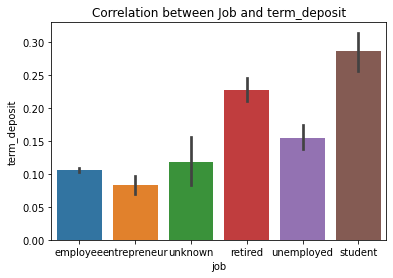

In [3]:
sn.barplot(data=clean_data, x='job', y='term_deposit').set(title='Correlation between Job and term_deposit')

[Text(0.5, 1.0, 'Correlation between marital and term_deposit')]

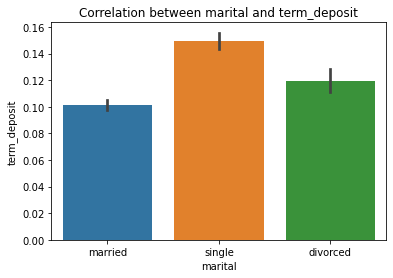

In [4]:
sn.barplot(data=clean_data, x='marital', y='term_deposit').set(title='Correlation between marital and term_deposit')

[Text(0.5, 1.0, 'Correlation between credit_card and term_deposit')]

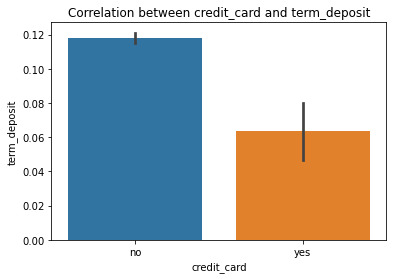

In [5]:
sn.barplot(data=clean_data, x='credit_card', y='term_deposit').set(title='Correlation between credit_card and term_deposit')

[Text(0.5, 1.0, 'Correlation between housing and term_deposit')]

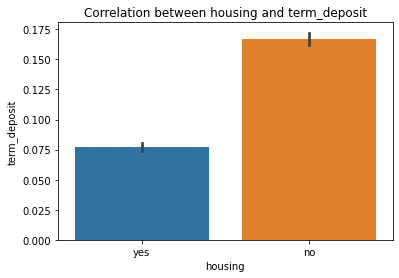

In [6]:
sn.barplot(data=clean_data, x='housing', y='term_deposit').set(title='Correlation between housing and term_deposit')

[Text(0.5, 1.0, 'Correlation between loan and term_deposit')]

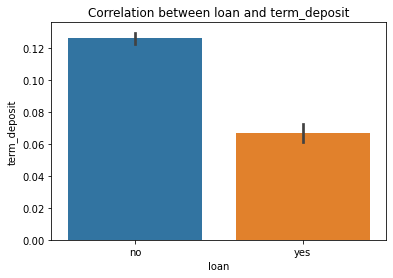

In [7]:
sn.barplot(data=clean_data, x='loan', y='term_deposit').set(title='Correlation between loan and term_deposit')

In [8]:
# We have to some data transformation(encoding) before applying the Logistic Regression algorithm.

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
transform_data=clean_data
clean_data['job']= le.fit_transform(clean_data['job'])
clean_data['credit_card']= le.fit_transform(clean_data['credit_card'])
clean_data['housing']= le.fit_transform(clean_data['housing'])
clean_data['loan']= le.fit_transform(clean_data['loan'])
clean_data['marital']= le.fit_transform(clean_data['marital'])
transform_data.head()

,job,marital,credit_card,housing,loan,term_deposit
0,0,1,0,1,0,0
1,0,2,0,1,0,0
2,1,1,0,1,1,0
3,0,1,0,1,0,0
4,5,2,0,0,0,0


In [9]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = transform_data[['job','loan','marital','credit_card','housing']]
y = transform_data['term_deposit']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.88


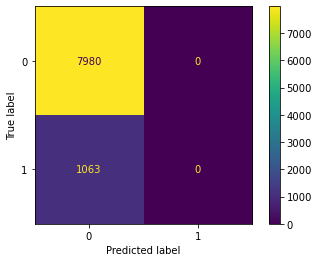

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7980
           1       0.00      0.00      0.00      1063

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.88      0.83      9043



In [12]:
transform_data['term_deposit'].value_counts()

0    39922
1     5289
Name: term_deposit, dtype: int64

#### The confusion matrix and the classification report show that for the class 1 (client will subscribe) there is no true positive.
#### An explanation to this is that in our dataset the class 0(client won't subscribe) value far exceeds the class 1 value.
#### We can say then that the probability for a client to not subscribe is accurate at 88%.

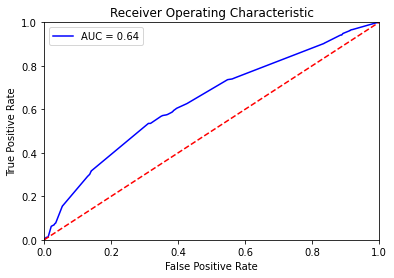

In [13]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification.
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds) 
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) # we are plotting True Positive Rate vs 
#False Positive Ratewith the blue line.

plt.legend() #To display the AUC value in the graph.

plt.plot([0, 1], [0, 1],'r--') #The red dotted line shows where True Positive Rate =False Positive Rate.

#Our graph should be in values between (0,0),(1,1).
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show() # To display a graph that will show TPR vs FPR at all thresholds.

#### AUC= 0.64 it is near to the 1 which means our model has a good measure of separability.